<a href="https://colab.research.google.com/github/KaluLIS/COMPLEXITY/blob/main/M7001R_QUIZ_2_24000126297.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

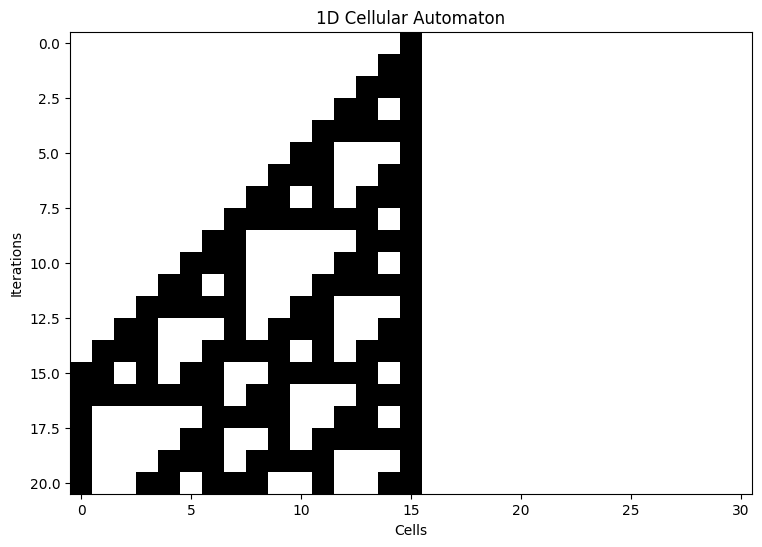

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rule as a dictionary (key: (left, center, right), value: new state)
rule = {
    (1, 1, 1): 0,
    (1, 1, 0): 1,
    (1, 0, 1): 1,
    (1, 0, 0): 0,
    (0, 1, 1): 1,
    (0, 1, 0): 1,
    (0, 0, 1): 1,
    (0, 0, 0): 0,
}

# Function to compute the next state of the row
def next_row(current_row, rule):
    extended_row = np.pad(current_row, (1, 1), mode='constant')  # Pad with zeros
    new_row = []
    for i in range(1, len(extended_row) - 1):
        neighborhood = (extended_row[i - 1], extended_row[i], extended_row[i + 1])
        new_row.append(rule[neighborhood])
    return np.array(new_row)

# Initialize the first row
n_cells = 31  # Number of cells in the row
initial_row = np.zeros(n_cells, dtype=int)
initial_row[n_cells // 2] = 1  # Start with one black cell in the middle

# Generate 20 iterations
n_iterations = 20
rows = [initial_row]
current_row = initial_row
for _ in range(n_iterations):
    current_row = next_row(current_row, rule)
    rows.append(current_row)

# Convert to a numpy array for easy plotting
rows = np.array(rows)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(rows, cmap='binary', interpolation='nearest')
plt.title("1D Cellular Automaton")
plt.xlabel("Cells")
plt.ylabel("Iterations")
plt.show()
